In [1]:
import pandas as pd
import numpy as np

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from sklearn import set_config
set_config(display="diagram")
pd.set_option('display.max_columns', None)

In [2]:
#reading data
df_acc=pd.read_csv('accident_data.csv')
df_veh=pd.read_csv('vehicle_data.csv', encoding='latin1')

In [3]:
df=pd.merge(df_veh, df_acc, on='Accident_Index')

In [4]:
#Data Missing or out of range->nan
def missing_values_change(val):
    if str(val)=="Unclassified" or str(val)=='None' or str(val)=="Data missing or out of range" or str(val)=="Unallocated":
        return np.nan
    else:
        return val
for col in df.columns:
    df[col] = df[col].apply(lambda x:missing_values_change(x))

In [5]:
df.head()

,Accident_Index,Age_Band_of_Driver,Age_of_Vehicle,Driver_Home_Area_Type,Driver_IMD_Decile,Engine_Capacity_.CC.,Hit_Object_in_Carriageway,Hit_Object_off_Carriageway,Journey_Purpose_of_Driver,Junction_Location,make,model,Propulsion_Code,Sex_of_Driver,Skidding_and_Overturning,Towing_and_Articulation,Vehicle_Leaving_Carriageway,Vehicle_Location.Restricted_Lane,Vehicle_Manoeuvre,Vehicle_Reference,Vehicle_Type,Was_Vehicle_Left_Hand_Drive,X1st_Point_of_Impact,Year_x,1st_Road_Class,1st_Road_Number,2nd_Road_Class,2nd_Road_Number,Accident_Severity,Carriageway_Hazards,Date,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,Junction_Control,Junction_Detail,Latitude,Light_Conditions,Local_Authority_(District),Local_Authority_(Highway),Location_Easting_OSGR,Location_Northing_OSGR,Longitude,LSOA_of_Accident_Location,Number_of_Casualties,Number_of_Vehicles,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Police_Force,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year_y,InScotland
0,200501BS00002,36 - 45,3.0,NaN,NaN,8268.0,NaN,NaN,Journey as part of work,Leaving roundabout,DENNIS,NaN,Heavy oil,Male,NaN,No tow/articulation,Did not leave carriageway,0.0,Slowing or stopping,1,Bus or coach (17 or more pass seats),No,Nearside,2005,B,450.0,C,0.0,Slight,NaN,05/01/2005,Wednesday,1.0,Auto traffic signal,Crossroads,51.520075,Darkness - lights lit,Kensington and Chelsea,Kensington and Chelsea,524170.0,181650.0,-0.211708,E01002909,1,1,0.0,5.0,Metropolitan Police,Dry,Dual carriageway,NaN,30,17:36,Urban,Fine no high winds,2005,No
1,200501BS00003,26 - 35,5.0,Urban area,3.0,8300.0,Parked vehicle,NaN,Journey as part of work,Not at or within 20 metres of junction,DENNIS,NaN,Heavy oil,Male,NaN,No tow/articulation,Did not leave carriageway,0.0,Going ahead right-hand bend,1,Bus or coach (17 or more pass seats),No,Nearside,2005,C,0.0,NaN,0.0,Slight,NaN,06/01/2005,Thursday,1.0,NaN,Not at junction or within 20 metres,51.525301,Darkness - lights lit,Kensington and Chelsea,Kensington and Chelsea,524520.0,182240.0,-0.206458,E01002857,1,2,0.0,0.0,Metropolitan Police,Dry,Single carriageway,NaN,30,00:15,Urban,Fine no high winds,2005,No
2,200501BS00004,46 - 55,4.0,Urban area,1.0,1769.0,NaN,NaN,Other/Not known (2005-10),Not at or within 20 metres of junction,NISSAN,ALMERA SE AUTO,Petrol,Female,NaN,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,1,Car,No,Front,2005,A,3220.0,NaN,0.0,Slight,NaN,07/01/2005,Friday,1.0,NaN,Not at junction or within 20 metres,51.482442,NaN,Kensington and Chelsea,Kensington and Chelsea,526900.0,177530.0,-0.173862,E01002840,1,1,0.0,0.0,Metropolitan Police,Dry,Single carriageway,NaN,30,10:35,Urban,Fine no high winds,2005,No
3,200501BS00005,46 - 55,10.0,NaN,NaN,85.0,Kerb,NaN,Other/Not known (2005-10),Not at or within 20 metres of junction,HONDA,NaN,Petrol,Male,Skidded,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,1,Motorcycle 125cc and under,No,Front,2005,NaN,0.0,NaN,0.0,Slight,NaN,10/01/2005,Monday,1.0,NaN,Not at junction or within 20 metres,51.495752,Darkness - lighting unknown,Kensington and Chelsea,Kensington and Chelsea,528060.0,179040.0,-0.156618,E01002863,1,1,0.0,0.0,Metropolitan Police,Wet or damp,Single carriageway,NaN,30,21:13,Urban,Fine no high winds,2005,No
4,200501BS00006,46 - 55,1.0,Urban area,4.0,2976.0,NaN,NaN,Other/Not known (2005-10),Not at or within 20 metres of junction,AUDI,A4 SPORT CABRIOLET AUTO,Petrol,Male,NaN,No tow/articulation,Did not leave carriageway,0.0,Moving off,1,Car,No,Did not impact,2005,NaN,0.0,NaN,0.0,Slight,NaN,11/01/2005,Tuesday,1.0,NaN,Not at junction or within 20 metres,51.515540,NaN,Kensington and Chelsea,Kensington and Chelsea,524770.0,181160.0,-0.203238,E01002832,1,2,0.0,0.0,Metropolitan Police,Wet or damp,Single carriageway,Oil or diesel,30,12:40,Urban,Raining no high winds,2005,No


In [6]:
#checking missing values percentage
df.isnull().mean()*100

Accident_Index                                  0.000000
Age_Band_of_Driver                              7.828366
Age_of_Vehicle                                 13.150369
Driver_Home_Area_Type                          14.814275
Driver_IMD_Decile                              21.894063
Engine_Capacity_.CC.                            8.558206
Hit_Object_in_Carriageway                      95.920202
Hit_Object_off_Carriageway                     91.414160
Journey_Purpose_of_Driver                       2.761316
Junction_Location                               0.575014
make                                            0.000000
model                                          14.312510
Propulsion_Code                                 7.049126
Sex_of_Driver                                   0.001136
Skidding_and_Overturning                       86.487172
Towing_and_Articulation                         0.003975
Vehicle_Leaving_Carriageway                     0.003218
Vehicle_Location.Restricted_Lan

In [7]:
#identifying columns that contain upto 5 percent missing data 
cols_upto_5=[var for var in df.columns if df[var].isnull().mean() < 0.05 and 
            df[var].isnull().mean() > 0]

cols_upto_5

['Journey_Purpose_of_Driver',
 'Junction_Location',
 'Sex_of_Driver',
 'Towing_and_Articulation',
 'Vehicle_Leaving_Carriageway',
 'Vehicle_Location.Restricted_Lane',
 'Vehicle_Manoeuvre',
 'Vehicle_Type',
 'Was_Vehicle_Left_Hand_Drive',
 'X1st_Point_of_Impact',
 '1st_Road_Number',
 '2nd_Road_Number',
 'Did_Police_Officer_Attend_Scene_of_Accident',
 'Junction_Detail',
 'Latitude',
 'Light_Conditions',
 'Location_Easting_OSGR',
 'Location_Northing_OSGR',
 'Longitude',
 'LSOA_of_Accident_Location',
 'Pedestrian_Crossing-Human_Control',
 'Pedestrian_Crossing-Physical_Facilities',
 'Road_Surface_Conditions',
 'Road_Type',
 'Time',
 'Urban_or_Rural_Area',
 'Weather_Conditions',
 'InScotland']

In [8]:
new_df=df[cols_upto_5].dropna()

In [9]:
new_df.shape

(473606, 28)

In [10]:
df2=df.merge(new_df)

In [11]:
df2.shape

(486524, 57)

<AxesSubplot:>

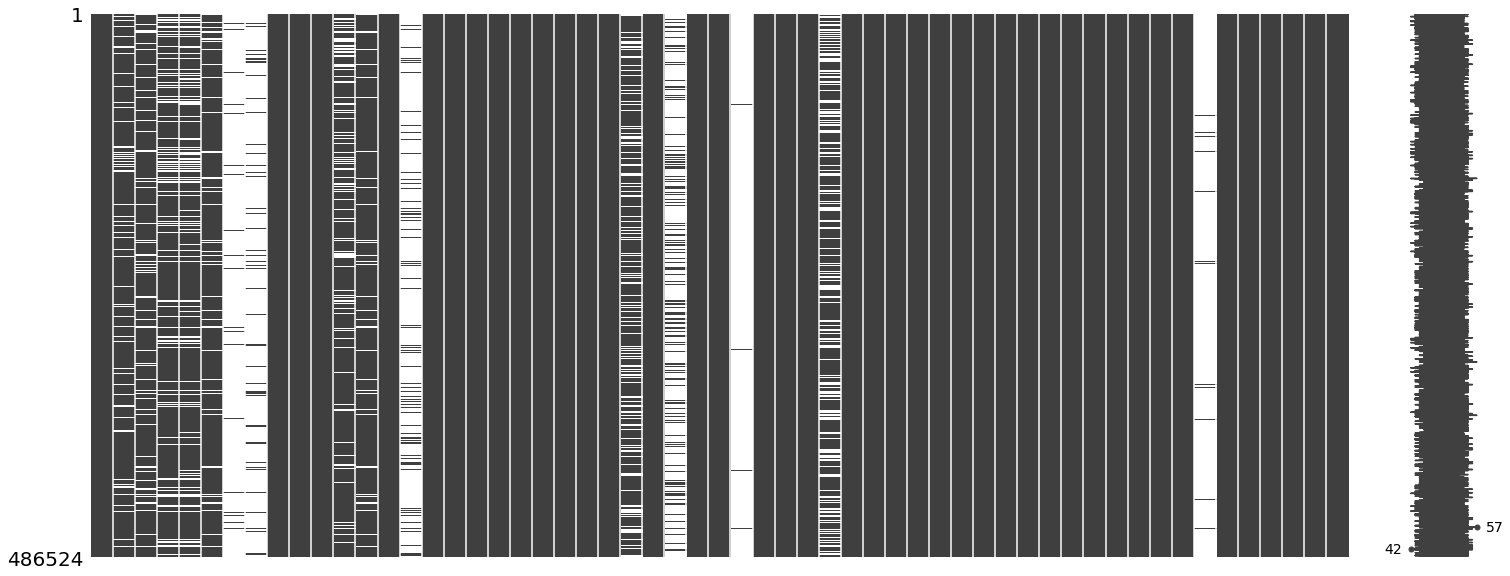

In [12]:
import missingno as msno
msno.matrix(df2)

In [13]:
#identifying columns that contain more than 75 percent missing data 
cols_morethan_75=[var for var in df2.columns if df2[var].isnull().mean() >  0.75]

<AxesSubplot:>

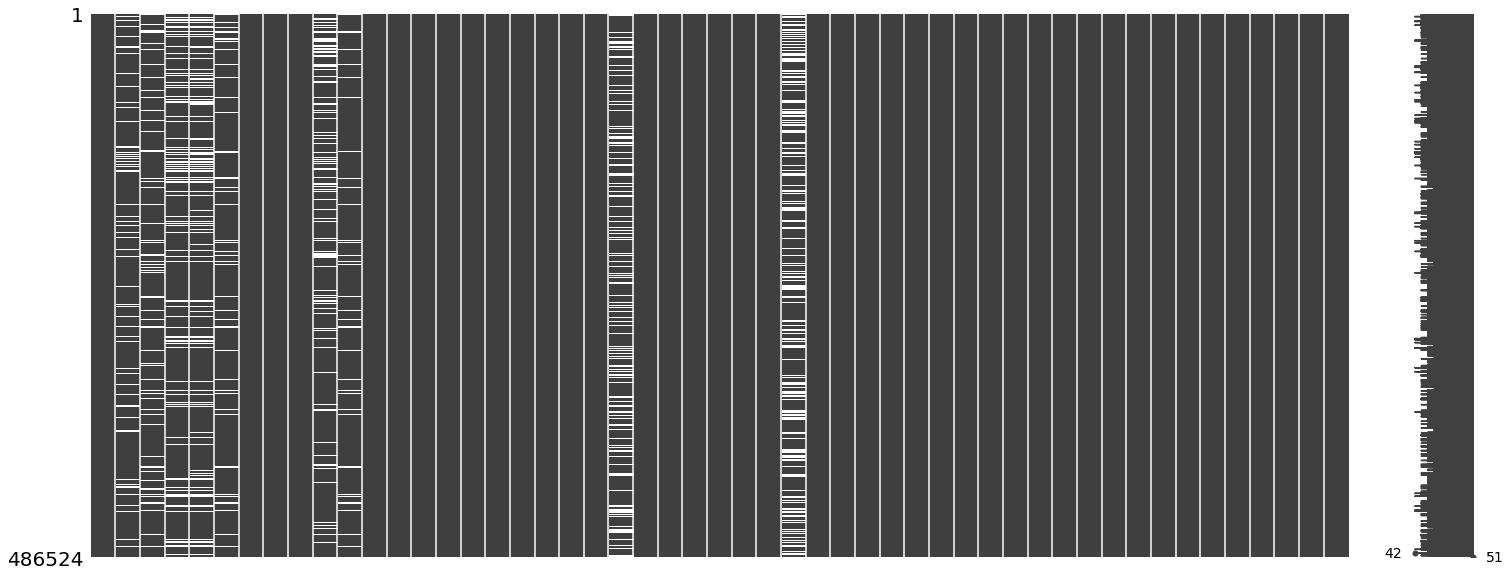

In [14]:
df2=df2.drop(df2[cols_morethan_75], axis =1)
        
msno.matrix(df2)

In [15]:
#replacing misspelled values
df2['Junction_Control'] = df2['Junction_Control'].replace(to_replace='Auto traffic sigl', value='Auto traffic signal')

In [16]:
#splitting Time into Hours
df2['Hour']=df2['Time'].str.split(':').str[0]

#splitting Date into days and months
df2['Day']=df2['Date'].str.split('/').str[0]
df2['Month']=df2['Date'].str.split('/').str[1]

#splitting Age_Band_of_Driver
df2['Age_of_Driver']=df2['Age_Band_of_Driver'].str.split('-').str[1]

In [17]:
#converting Hour, Day, Month column type to integer
df2['Hour']=df2['Hour'].astype(int)
df2['Day']=df2['Day'].astype(int)
df2['Month']=df2['Month'].astype(int)
#df2['Age_of_Driver'] = df2['Age_of_Driver'].fillna(9999).astype(int)
df2['Age_of_Driver']=df2['Age_of_Driver'].astype(float)
#df2['Age_of_Driver'].isnull().sum()

In [18]:
#drop the Time, Minute and Date columns
df2 = df2.drop('Time', axis=1)
df2 = df2.drop('Date', axis=1)
df2 = df2.drop('Age_Band_of_Driver', axis=1)

In [19]:
df2[['Age_of_Driver','Hour', 'Day', 'Month']].sample(10)

,Age_of_Driver,Hour,Day,Month
188710,75.0,12,13,4
255391,25.0,11,15,12
397765,55.0,22,18,9
124927,65.0,18,17,10
399030,35.0,16,17,3
322268,20.0,22,22,3
137808,35.0,19,11,9
318462,35.0,7,30,1
267409,45.0,14,14,9
432843,35.0,7,16,3


In [20]:
#drop columns that contain useless or extra information
df2 = df2.drop('Location_Easting_OSGR', axis=1)
df2 = df2.drop('Location_Northing_OSGR', axis=1)
df2 = df2.drop('Accident_Index', axis=1)

In [21]:
#create a copy of df2
df3=df2.copy()

In [22]:
#identify categorical and numeric features
cat_cols=df3.select_dtypes('object').columns
num_cols=df3.select_dtypes('number').columns

In [23]:
#drop accident_severity bcuz it will be one-hot encoded and the rest of the cat_cols will be label encoded
cat_cols=cat_cols.drop('Accident_Severity')

In [24]:
#identify columns containing more than 5 percent missing data
cat_cols_morethan_5=[var for var in df3.columns if df3[var].isnull().mean() > 0.05 and df3[var].dtype=="object" ]
num_cols_morethan_5=[var for var in df3.columns if df3[var].isnull().mean() > 0.05 and df3[var].dtype=="int" or df3[var].dtype=="float"]

num_cols_morethan_5

['Age_of_Vehicle',
 'Driver_IMD_Decile',
 'Engine_Capacity_.CC.',
 'Vehicle_Location.Restricted_Lane',
 '1st_Road_Number',
 '2nd_Road_Number',
 'Did_Police_Officer_Attend_Scene_of_Accident',
 'Latitude',
 'Longitude',
 'Pedestrian_Crossing-Human_Control',
 'Pedestrian_Crossing-Physical_Facilities',
 'Age_of_Driver']

In [25]:
#create a column transformer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer

ct = ColumnTransformer([
    ('Cat_Imputer', SimpleImputer(strategy='constant', fill_value='Data Missing'),cat_cols_morethan_5),
    ('Num_Imputer', SimpleImputer(strategy='mean'),num_cols_morethan_5),
    ('OrdinalEncoder', OrdinalEncoder(categories=[['Slight','Serious','Fatal']]),['Accident_Severity']),

])

ct

ColumnTransformer(transformers=[('Cat_Imputer',
                                 SimpleImputer(fill_value='Data Missing',
                                               strategy='constant'),
                                 ['Driver_Home_Area_Type', 'model',
                                  'Propulsion_Code', '1st_Road_Class',
                                  'Junction_Control']),
                                ('Num_Imputer', SimpleImputer(),
                                 ['Age_of_Vehicle', 'Driver_IMD_Decile',
                                  'Engine_Capacity_.CC.',
                                  'Vehicle_Location.Restricted_Lane',
                                  '1st_Road_Number', '2nd_Road_Number',
                                  'Did_Police_Officer_Attend_Scene_of_Accident',
                                  'Latitude', 'Longitude',
                                  'Pedestrian_Crossing-Human_Control',
                                  'Pedestrian_Crossing-Physical_Facilities',
                                  'Age_of_Driver']),
                                ('OrdinalEncoder',
                                 OrdinalEncoder(categories=[['Slight',
                                                             'Serious',
                                                             'Fatal']]),
                                 ['Accident_Severity'])])

In [26]:
#tranform
arr=ct.fit_transform(df3)
#convert to dataframe
arr_df=pd.DataFrame(arr)
#rename the transformed labels back to their original labels
arr_df=arr_df.rename(columns={0:'Driver_Home_Area_Type', 1:'model', 2:'Propulsion_Code', 3:'1st_Road_Class', 
                              4:'Junction_Control', 5:'Age_of_Vehicle', 6:'Driver_IMD_Decile', 7:'Engine_Capacity_.CC.',
                              8:'Vehicle_Location.Restricted_Lane', 9:'1st_Road_Number', 10:'2nd_Road_Number',
                              11:'Did_Police_Officer_Attend_Scene_of_Accident', 12:'Latitude', 13:'Longitude', 
                              14:'Pedestrian_Crossing-Human_Control', 15:'Pedestrian_Crossing-Physical_Facilities', 
                              16:'Age_of_Driver', 17:'Accident_Severity'})
#arr_df.sample(5)

In [27]:
#replace the raw dataframes with the transformed dataframes
df3['Driver_Home_Area_Type']=arr_df['Driver_Home_Area_Type']
df3['model']=arr_df['model']
df3['Propulsion_Code']=arr_df['Propulsion_Code']
df3['1st_Road_Class']=arr_df['1st_Road_Class']
df3['Junction_Control']=arr_df['Junction_Control']
df3['Age_of_Vehicle']=arr_df['Age_of_Vehicle']
df3['Driver_IMD_Decile']=arr_df['Driver_IMD_Decile']
df3['Engine_Capacity_.CC.']=arr_df['Engine_Capacity_.CC.']
df3['Vehicle_Location.Restricted_Lane']=arr_df['Vehicle_Location.Restricted_Lane']
df3['1st_Road_Number']=arr_df['1st_Road_Number']
df3['2nd_Road_Number']=arr_df['2nd_Road_Number']
df3['Did_Police_Officer_Attend_Scene_of_Accident']=arr_df['Did_Police_Officer_Attend_Scene_of_Accident']
df3['Latitude']=arr_df['Latitude']
df3['Longitude']=arr_df['Longitude']
df3['Pedestrian_Crossing-Human_Control']=arr_df['Pedestrian_Crossing-Human_Control']
df3['Pedestrian_Crossing-Physical_Facilities']=arr_df['Pedestrian_Crossing-Physical_Facilities']
df3['Age_of_Driver']=arr_df['Age_of_Driver']
df3['Accident_Severity']=arr_df['Accident_Severity']


df3['Accident_Severity']=df3['Accident_Severity'].astype(int)
df3.shape

(486524, 49)

<AxesSubplot:>

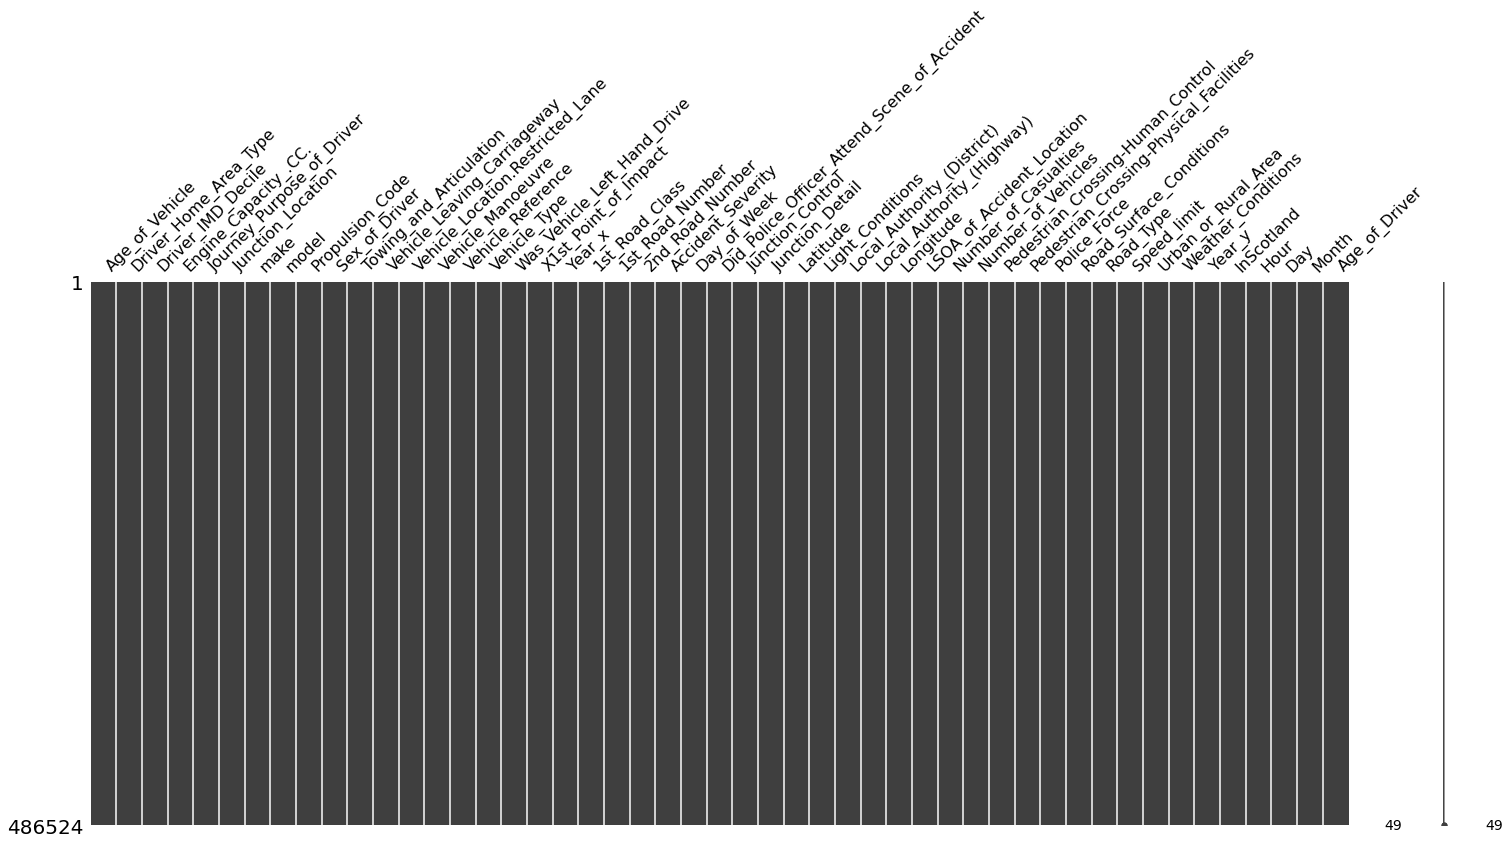

In [28]:
import missingno as msno

msno.matrix(df3)

In [29]:
#creating a function that checks the change in a column before and after impuatation
def compare(df2,df3,col):
    temp=pd.concat([
    df[col].value_counts()/len(df),
    df2[col].value_counts()/len(df2)], axis=1)
    temp.columns=['before', 'after']
    return temp

In [30]:
#calling function to check change in LSOA_of_Accident_Location before and after imputation
compare(df2,df3,'Driver_Home_Area_Type')

,before,after
Urban area,0.683665,0.693119
Rural,0.095816,0.089597
Small town,0.072376,0.069888


In [31]:
#dropping this column based on above observation
#df2 = df2.drop('LSOA_of_Accident_Location', axis=1)

In [32]:
#label encoder on cat_cols
label_encoder=LabelEncoder()
for cat_cols in cat_cols:
    df3[cat_cols]= label_encoder.fit_transform(df3[cat_cols])

df3.sample(10)

,Age_of_Vehicle,Driver_Home_Area_Type,Driver_IMD_Decile,Engine_Capacity_.CC.,Journey_Purpose_of_Driver,Junction_Location,make,model,Propulsion_Code,Sex_of_Driver,Towing_and_Articulation,Vehicle_Leaving_Carriageway,Vehicle_Location.Restricted_Lane,Vehicle_Manoeuvre,Vehicle_Reference,Vehicle_Type,Was_Vehicle_Left_Hand_Drive,X1st_Point_of_Impact,Year_x,1st_Road_Class,1st_Road_Number,2nd_Road_Number,Accident_Severity,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,Junction_Control,Junction_Detail,Latitude,Light_Conditions,Local_Authority_(District),Local_Authority_(Highway),Longitude,LSOA_of_Accident_Location,Number_of_Casualties,Number_of_Vehicles,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Police_Force,Road_Surface_Conditions,Road_Type,Speed_limit,Urban_or_Rural_Area,Weather_Conditions,Year_y,InScotland,Hour,Day,Month,Age_of_Driver
462990,27.0,3,4.0,848.0,2,7,290,14586,8,1,3,0,0.0,13,1,2,0,3,2010,4,0.0,0.0,0,1,1.0,3,2,53.704343,4,74,35,-0.874573,10478,2,2,0.0,0.0,13,4,3,30,1,1,2010,0,14,11,1,45.0
417647,8.0,3,3.0,1998.0,1,5,118,12836,5,1,3,0,0.0,12,1,13,0,3,2010,0,501.0,0.0,0,4,1.0,1,0,51.52315,4,264,125,-0.149025,4608,1,2,0.0,5.0,17,0,3,30,1,1,2010,0,9,25,11,35.0
31681,5.0,3,5.268217,2800.0,1,8,160,8118,5,1,3,0,0.0,2,1,15,0,2,2005,4,0.0,0.0,0,4,2.0,2,3,52.519989,4,189,95,-2.054497,9145,1,2,0.0,0.0,31,0,3,30,1,1,2005,0,13,10,3,25.0
50111,6.402357,1,9.0,6870.0,1,8,224,8118,5,1,3,0,0.0,15,1,3,0,2,2005,5,25.0,0.0,0,6,1.0,2,3,51.539704,4,201,14,-0.502374,13479,1,3,0.0,0.0,29,0,0,70,0,1,2005,0,17,29,6,45.0
39580,1.0,2,7.0,1998.0,2,7,291,6841,8,1,3,0,0.0,13,1,2,0,4,2005,0,17.0,151.0,0,1,1.0,3,8,52.81326,1,204,64,0.002362,18193,1,2,0.0,0.0,15,0,3,60,0,1,2005,0,22,30,5,35.0
36389,10.0,3,6.0,1108.0,2,8,115,14144,8,1,3,0,0.0,2,2,2,0,2,2005,4,0.0,0.0,1,0,1.0,2,3,53.171578,4,148,29,-1.454969,14287,2,2,0.0,0.0,4,4,3,60,0,1,2005,0,14,7,10,20.0
364993,12.0,3,9.0,1590.0,2,0,140,6539,8,0,3,3,0.0,3,2,2,0,2,2009,4,3732.0,0.0,0,4,1.0,3,8,51.321113,4,271,112,-0.539212,21364,1,4,0.0,0.0,28,0,3,30,1,1,2009,0,13,15,10,75.0
453355,1.0,3,5.0,1991.0,2,0,240,3331,5,0,3,0,0.0,17,1,2,0,2,2010,0,571.0,0.0,0,0,1.0,1,8,53.522913,1,266,126,-2.67662,6232,4,2,0.0,0.0,10,4,0,30,1,1,2010,0,18,5,11,55.0
455000,1.0,3,1.0,1397.0,2,7,246,13402,8,0,3,0,0.0,13,1,2,0,2,2010,0,663.0,6104.0,0,0,1.0,1,0,53.522376,4,159,80,-2.16528,5220,2,2,0.0,5.0,10,0,3,40,1,1,2010,0,18,2,7,20.0
437455,3.0,0,5.268217,2148.0,2,8,240,5410,5,0,3,0,0.0,3,2,2,0,0,2010,4,0.0,0.0,0,6,2.0,2,3,51.626634,4,78,36,-0.058704,1446,1,2,0.0,0.0,17,0,3,30,1,1,2010,0,17,17,3,42.8663


In [33]:
#create a copy of df3
df4=df3.copy()

In [34]:
#identify dependent and independent variables
X=df4.drop('Accident_Severity', axis=1)
y=df4.Accident_Severity

In [35]:
#split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [36]:
def Feature_Scaling(X_train, X_test):
    scaler = StandardScaler()
    X_train_after_Scaling=scaler.fit_transform(X_train)
    X_test_after_Scaling=scaler.fit_transform(X_test)
    return X_train_after_Scaling, X_test_after_Scaling

In [37]:
X_train_after_Scaling,X_test_after_Scaling=Feature_Scaling(X_train,X_test)

Text(0.5, 1.0, 'X_train_after_Scaling')

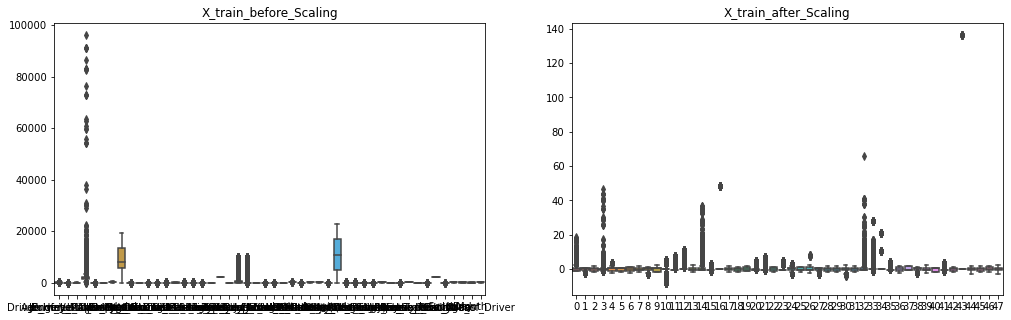

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.subplots(figsize=(17,5))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title('X_train_before_Scaling')
plt.subplot(1,2,2)
sns.boxplot(data=X_train_after_Scaling)
plt.title('X_train_after_Scaling')

In [39]:
#X_train_after_Scaling=pd.DataFrame(X_train_after_Scaling)
#X_train_after_Scaling

In [40]:
#counts('Junction_Control')

In [41]:
#def counts(col):
 #   return df2[col].value_counts()

In [42]:
#next Scaling, PCA
df3['Accident_Severity'].value_counts()

0    420767
1     59062
2      6695
Name: Accident_Severity, dtype: int64

In [43]:
corr_matrix=df3.corr()
corr_matrix['Accident_Severity'].sort_values(ascending=False)

Accident_Severity              1.000000
Number_of_Casualties           0.105990
Speed_limit                    0.089536
Vehicle_Leaving_Carriageway    0.072268
X1st_Point_of_Impact           0.064142
Junction_Location              0.063922
Vehicle_Type                   0.057965
Sex_of_Driver                  0.057955
LSOA_of_Accident_Location      0.052765
model                          0.013590
Road_Type                      0.009445
Propulsion_Code                0.007806
InScotland                     0.006535
Local_Authority_(District)     0.005776
Junction_Control               0.005375
Day                            0.003367
Local_Authority_(Highway)      0.001788
Was_Vehicle_Left_Hand_Drive   -0.000535
Month                         -0.002011
Hour                          -0.002391
make                          -0.002887
Journey_Purpose_of_Driver     -0.003934
Vehicle_Reference             -0.004040
Police_Force                  -0.005775
Number_of_Vehicles            -0.008681


# Model Implementation: Random Forest

In [44]:
#models implementation and evaluation

from sklearn.ensemble import RandomForestClassifier
# creating a RF classifier
clf = RandomForestClassifier(n_estimators = 100) 
 
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train_after_Scaling, y_train)
 
# performing predictions on the test dataset
y_pred = clf.predict(X_test_after_Scaling)
 
# metrics are used to find accuracy or error
from sklearn import metrics 
print()
 
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))


ACCURACY OF THE MODEL:  0.8724114896459586


## Feature Importance

In [45]:
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train_after_Scaling,y_train)

RandomForestClassifier()

In [46]:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

RandomForestClassifier(n_jobs=1)

In [47]:
feature_imp = pd.Series(clf.feature_importances_).sort_values(ascending=False)
feature_imp

30    0.053457
26    0.053305
31    0.051642
3     0.050652
7     0.046772
45    0.042347
44    0.040782
20    0.039237
28    0.038404
6     0.035581
0     0.035565
46    0.032399
29    0.031885
2     0.029385
47    0.025976
22    0.025887
13    0.024499
33    0.022538
36    0.022044
32    0.021970
42    0.020403
18    0.020267
17    0.019151
15    0.016885
5     0.013932
19    0.013555
21    0.013209
39    0.013074
25    0.012236
1     0.011333
4     0.010765
11    0.010602
14    0.010214
8     0.010002
24    0.009454
23    0.009348
41    0.009008
27    0.008534
38    0.008442
37    0.008181
35    0.008135
9     0.007187
40    0.005580
12    0.002917
10    0.002502
34    0.000615
16    0.000107
43    0.000039
dtype: float64

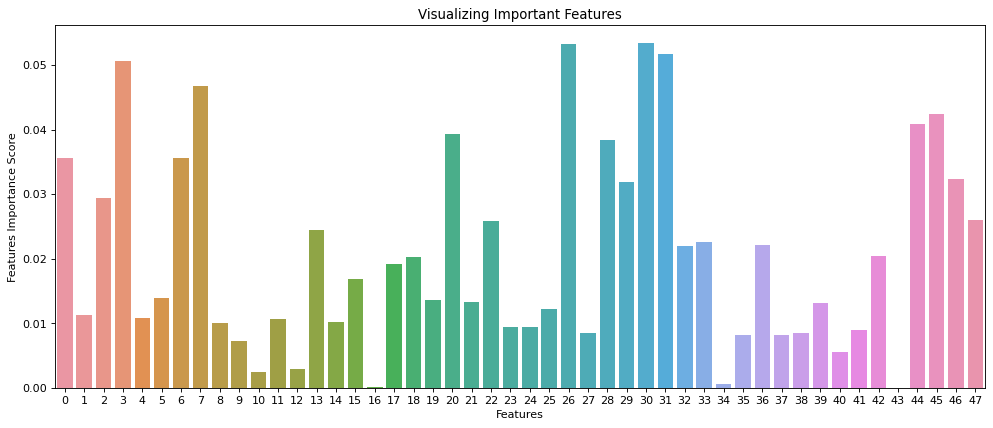

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.pyplot import figure
figure(figsize=(15, 6), dpi=80)

# Creating a bar plot
sns.barplot(x=feature_imp.index, y=feature_imp)
# Add labels to your graph
plt.xlabel('Features')
plt.ylabel('Features Importance Score')
plt.title("Visualizing Important Features")
#plt.legend()
plt.show()


## ROC Curve

In [49]:
 yhat = clf.predict_proba(X_test_after_Scaling)

 def plot_roc_curve(y_test, y_pred):
     n_classes = len(np.unique(y_test))
     y_test = label_binarize(y_test, classes=np.arange(n_classes))

     # Compute ROC curve and ROC area for each class
     fpr = dict()
     tpr = dict()
     roc_auc = dict()
     thresholds = dict()
     for i in range(n_classes):
       fpr[i], tpr[i], thresholds[i] = roc_curve(y_test[:, i], y_pred[:, i], drop_intermediate=False)
     roc_auc[i] = auc(fpr[i], tpr[i])

     # Compute micro-average ROC curve and ROC area
     fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel())
     roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

     # First aggregate all false positive rates
     all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

     # Then interpolate all ROC curves at this points
     mean_tpr = np.zeros_like(all_fpr)
     for i in range(n_classes):
       mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

     # Finally average it and compute AUC
     mean_tpr /= n_classes

     fpr["macro"] = all_fpr
     tpr["macro"] = mean_tpr
     roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

     # Plot all ROC curves
     #plt.figure(figsize=(10,5))
     plt.figure(dpi=600)
     lw = 2
     plt.plot(fpr["micro"], tpr["micro"],
     label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
     color="deeppink", linestyle=":", linewidth=4,)

     plt.plot(fpr["macro"], tpr["macro"],
     label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
     color="navy", linestyle=":", linewidth=4,)

     colors = cycle(["aqua", "darkorange", "darkgreen", "yellow", "blue"])
     for i, color in zip(range(n_classes), colors):
            plt.plot(fpr[i], tpr[i], color=color, lw=lw)
                #label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),)

     plt.plot([0, 1], [0, 1], "k--", lw=lw)
     plt.xlim([0.0, 1.0])
     plt.ylim([0.0, 1.05])
     plt.xlabel("False Positive Rate")
     plt.ylabel("True Positive Rate")
     plt.title("Receiver Operating Characteristic (ROC) curve")
     plt.legend()

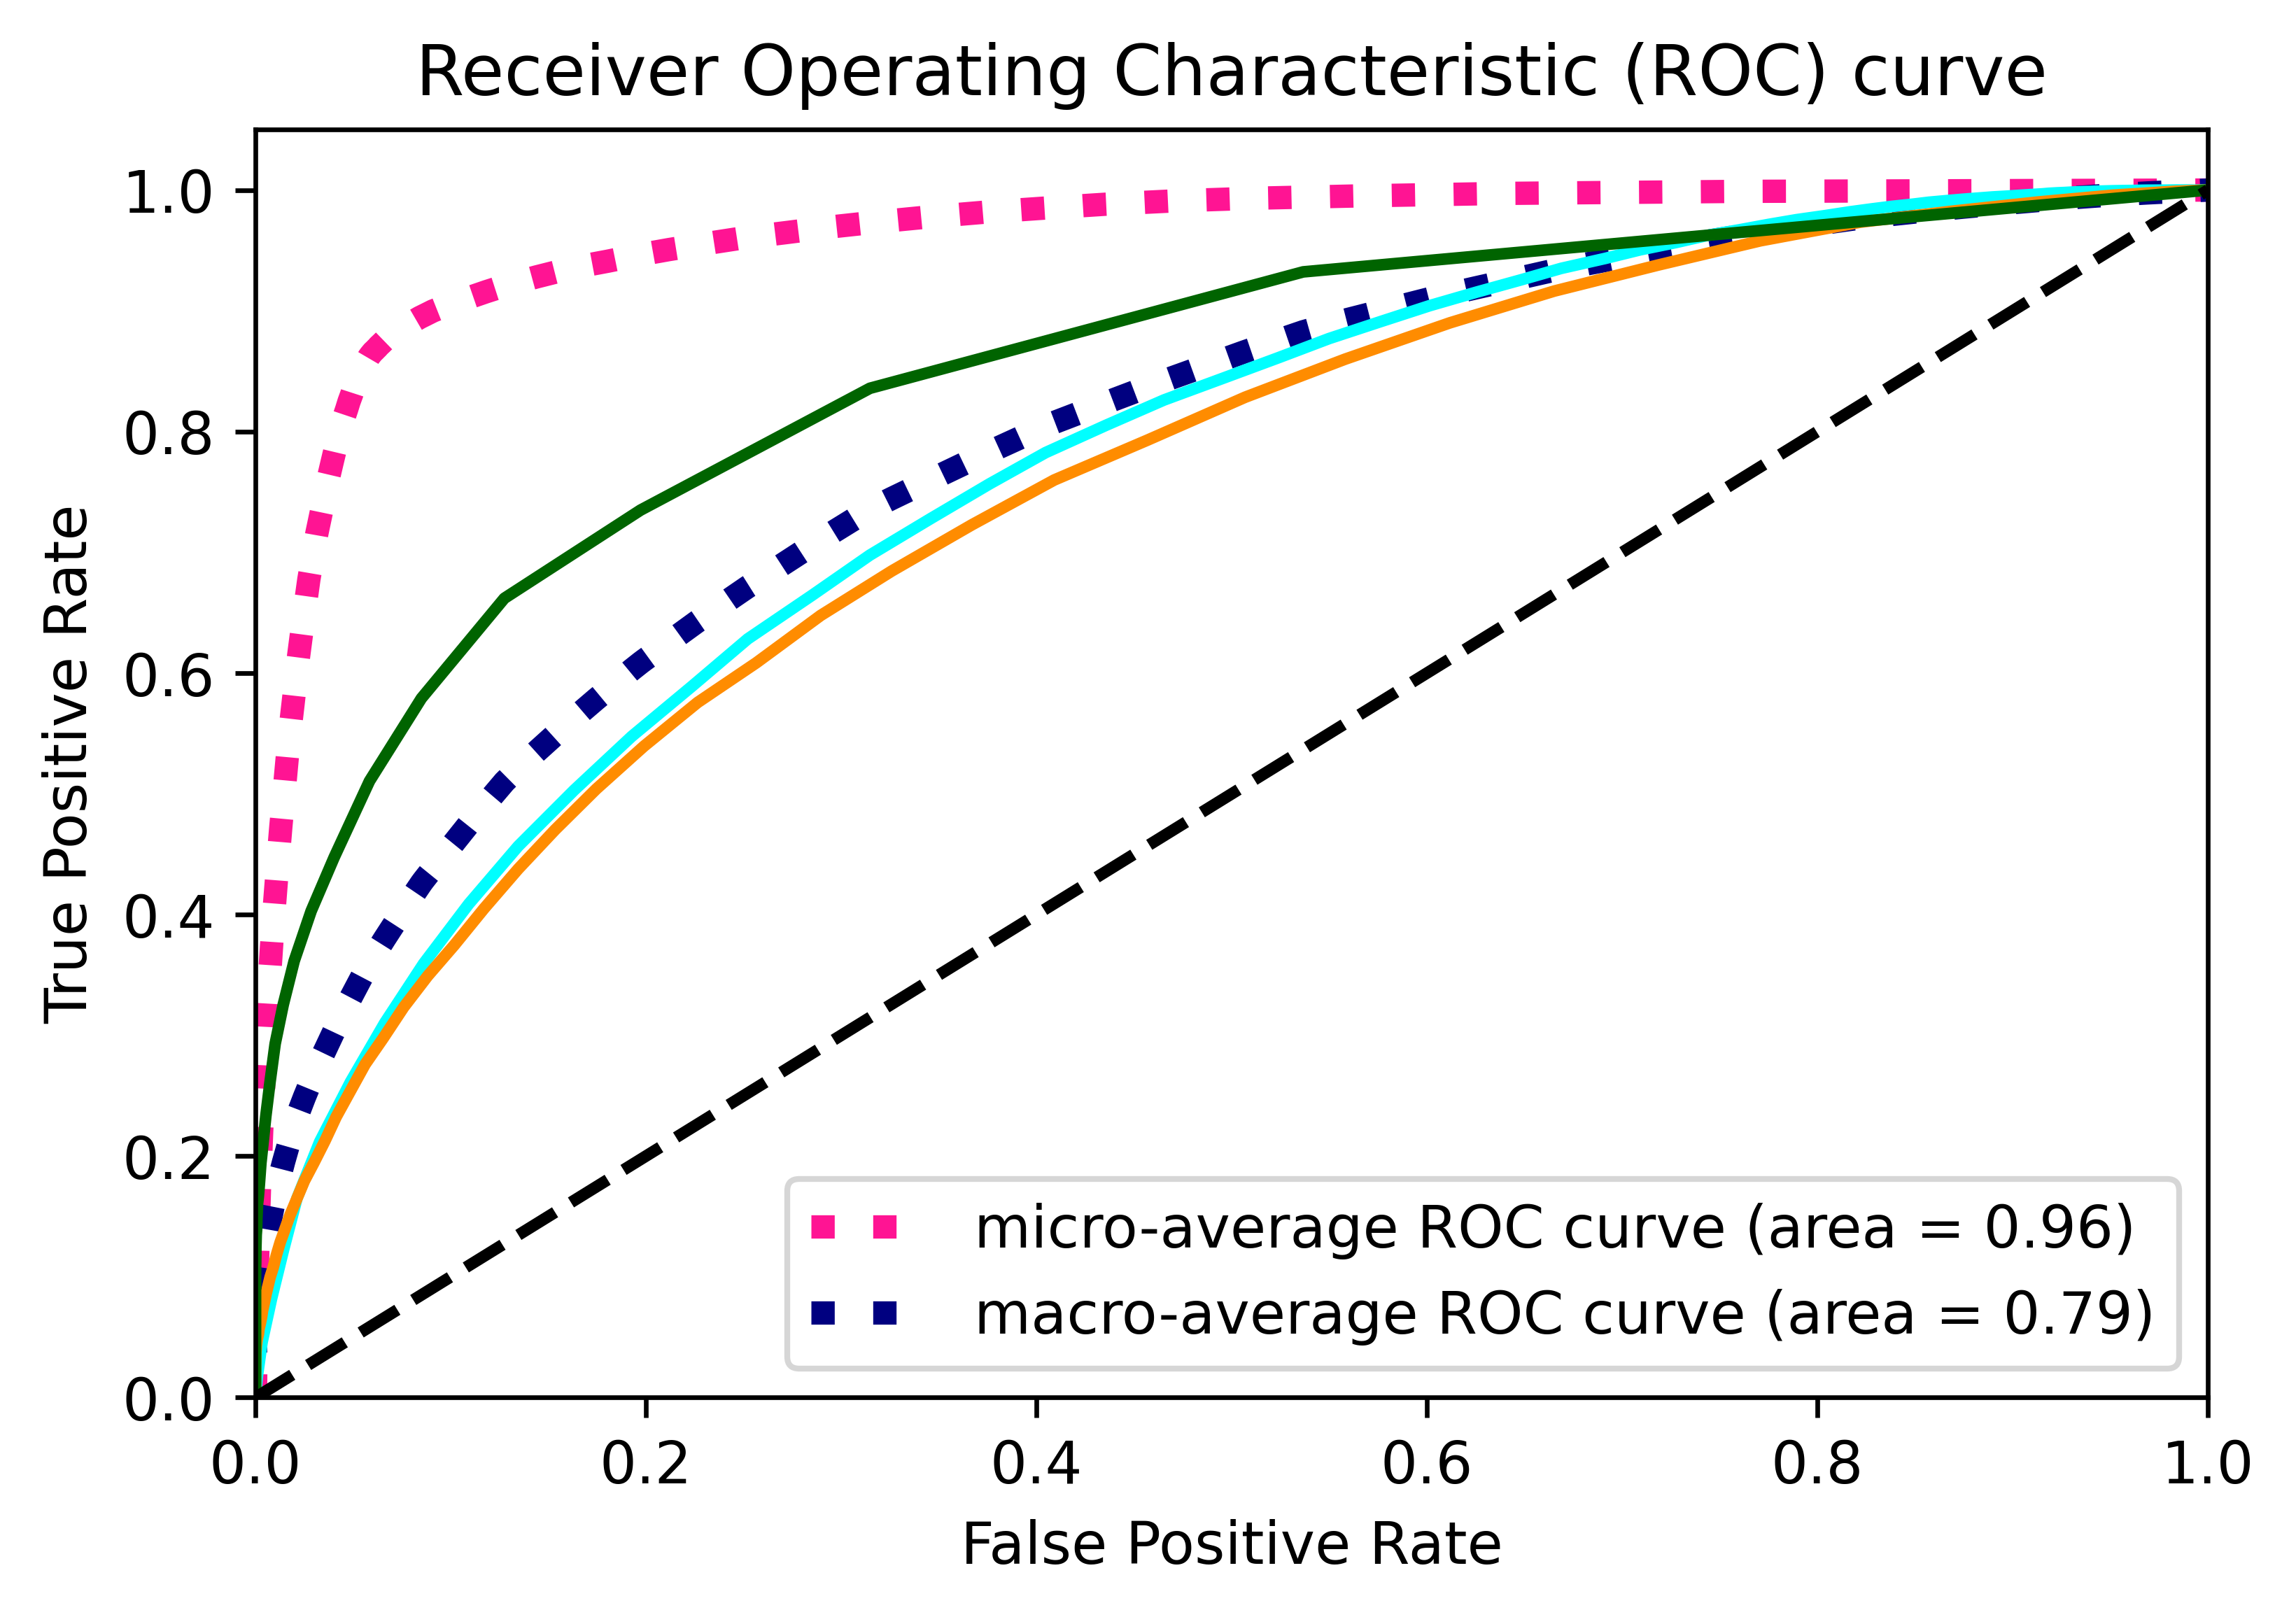

In [50]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from itertools import cycle


plot_roc_curve(y_test, yhat)

## Training model only on important features

In [52]:
df5=df3.copy()

In [53]:
X2=df5[['Longitude','Latitude','LSOA_of_Accident_Location','Engine_Capacity_.CC.','model','Hour','InScotland','1st_Road_Number',
        'Local_Authority_(District)','make','Age_of_Vehicle','Day','Local_Authority_(Highway)','Driver_IMD_Decile','Month',
        'Day_of_Week']]
y2=df5['Accident_Severity']

In [54]:
X_train2, X_test2, y_train2, y_test2=train_test_split(X2,y2,test_size=0.2,random_state=0)

In [55]:
X_train2_after_Scaling,X_test2_after_Scaling=Feature_Scaling(X_train2,X_test2)

Text(0.5, 1.0, 'X_train2_after_Scaling')

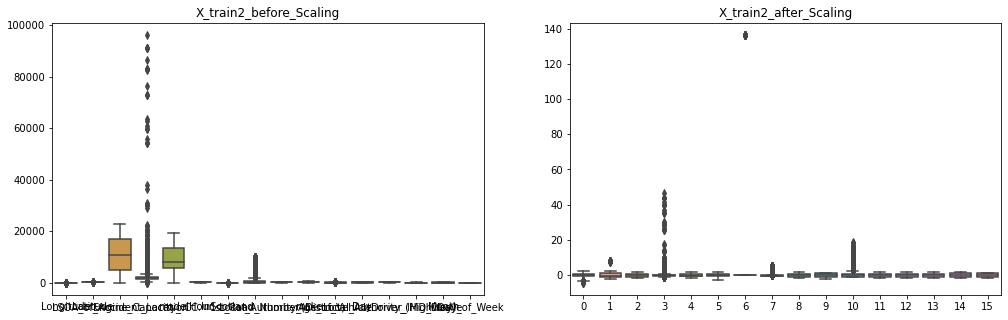

In [56]:
plt.subplots(figsize=(17,5))
plt.subplot(1,2,1)
sns.boxplot(data=X_train2)
plt.title('X_train2_before_Scaling')
plt.subplot(1,2,2)
sns.boxplot(data=X_train2_after_Scaling)
plt.title('X_train2_after_Scaling')

In [57]:
# creating a RF classifier
#clf = RandomForestClassifier(n_estimators = 100) 
 
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train2_after_Scaling, y_train2)
 
# performing predictions on the test dataset
y_pred2 = clf.predict(X_test2_after_Scaling)
 
# metrics are used to find accuracy or error
from sklearn import metrics 
print()
 
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test2, y_pred2))


ACCURACY OF THE MODEL:  0.8703458198448178


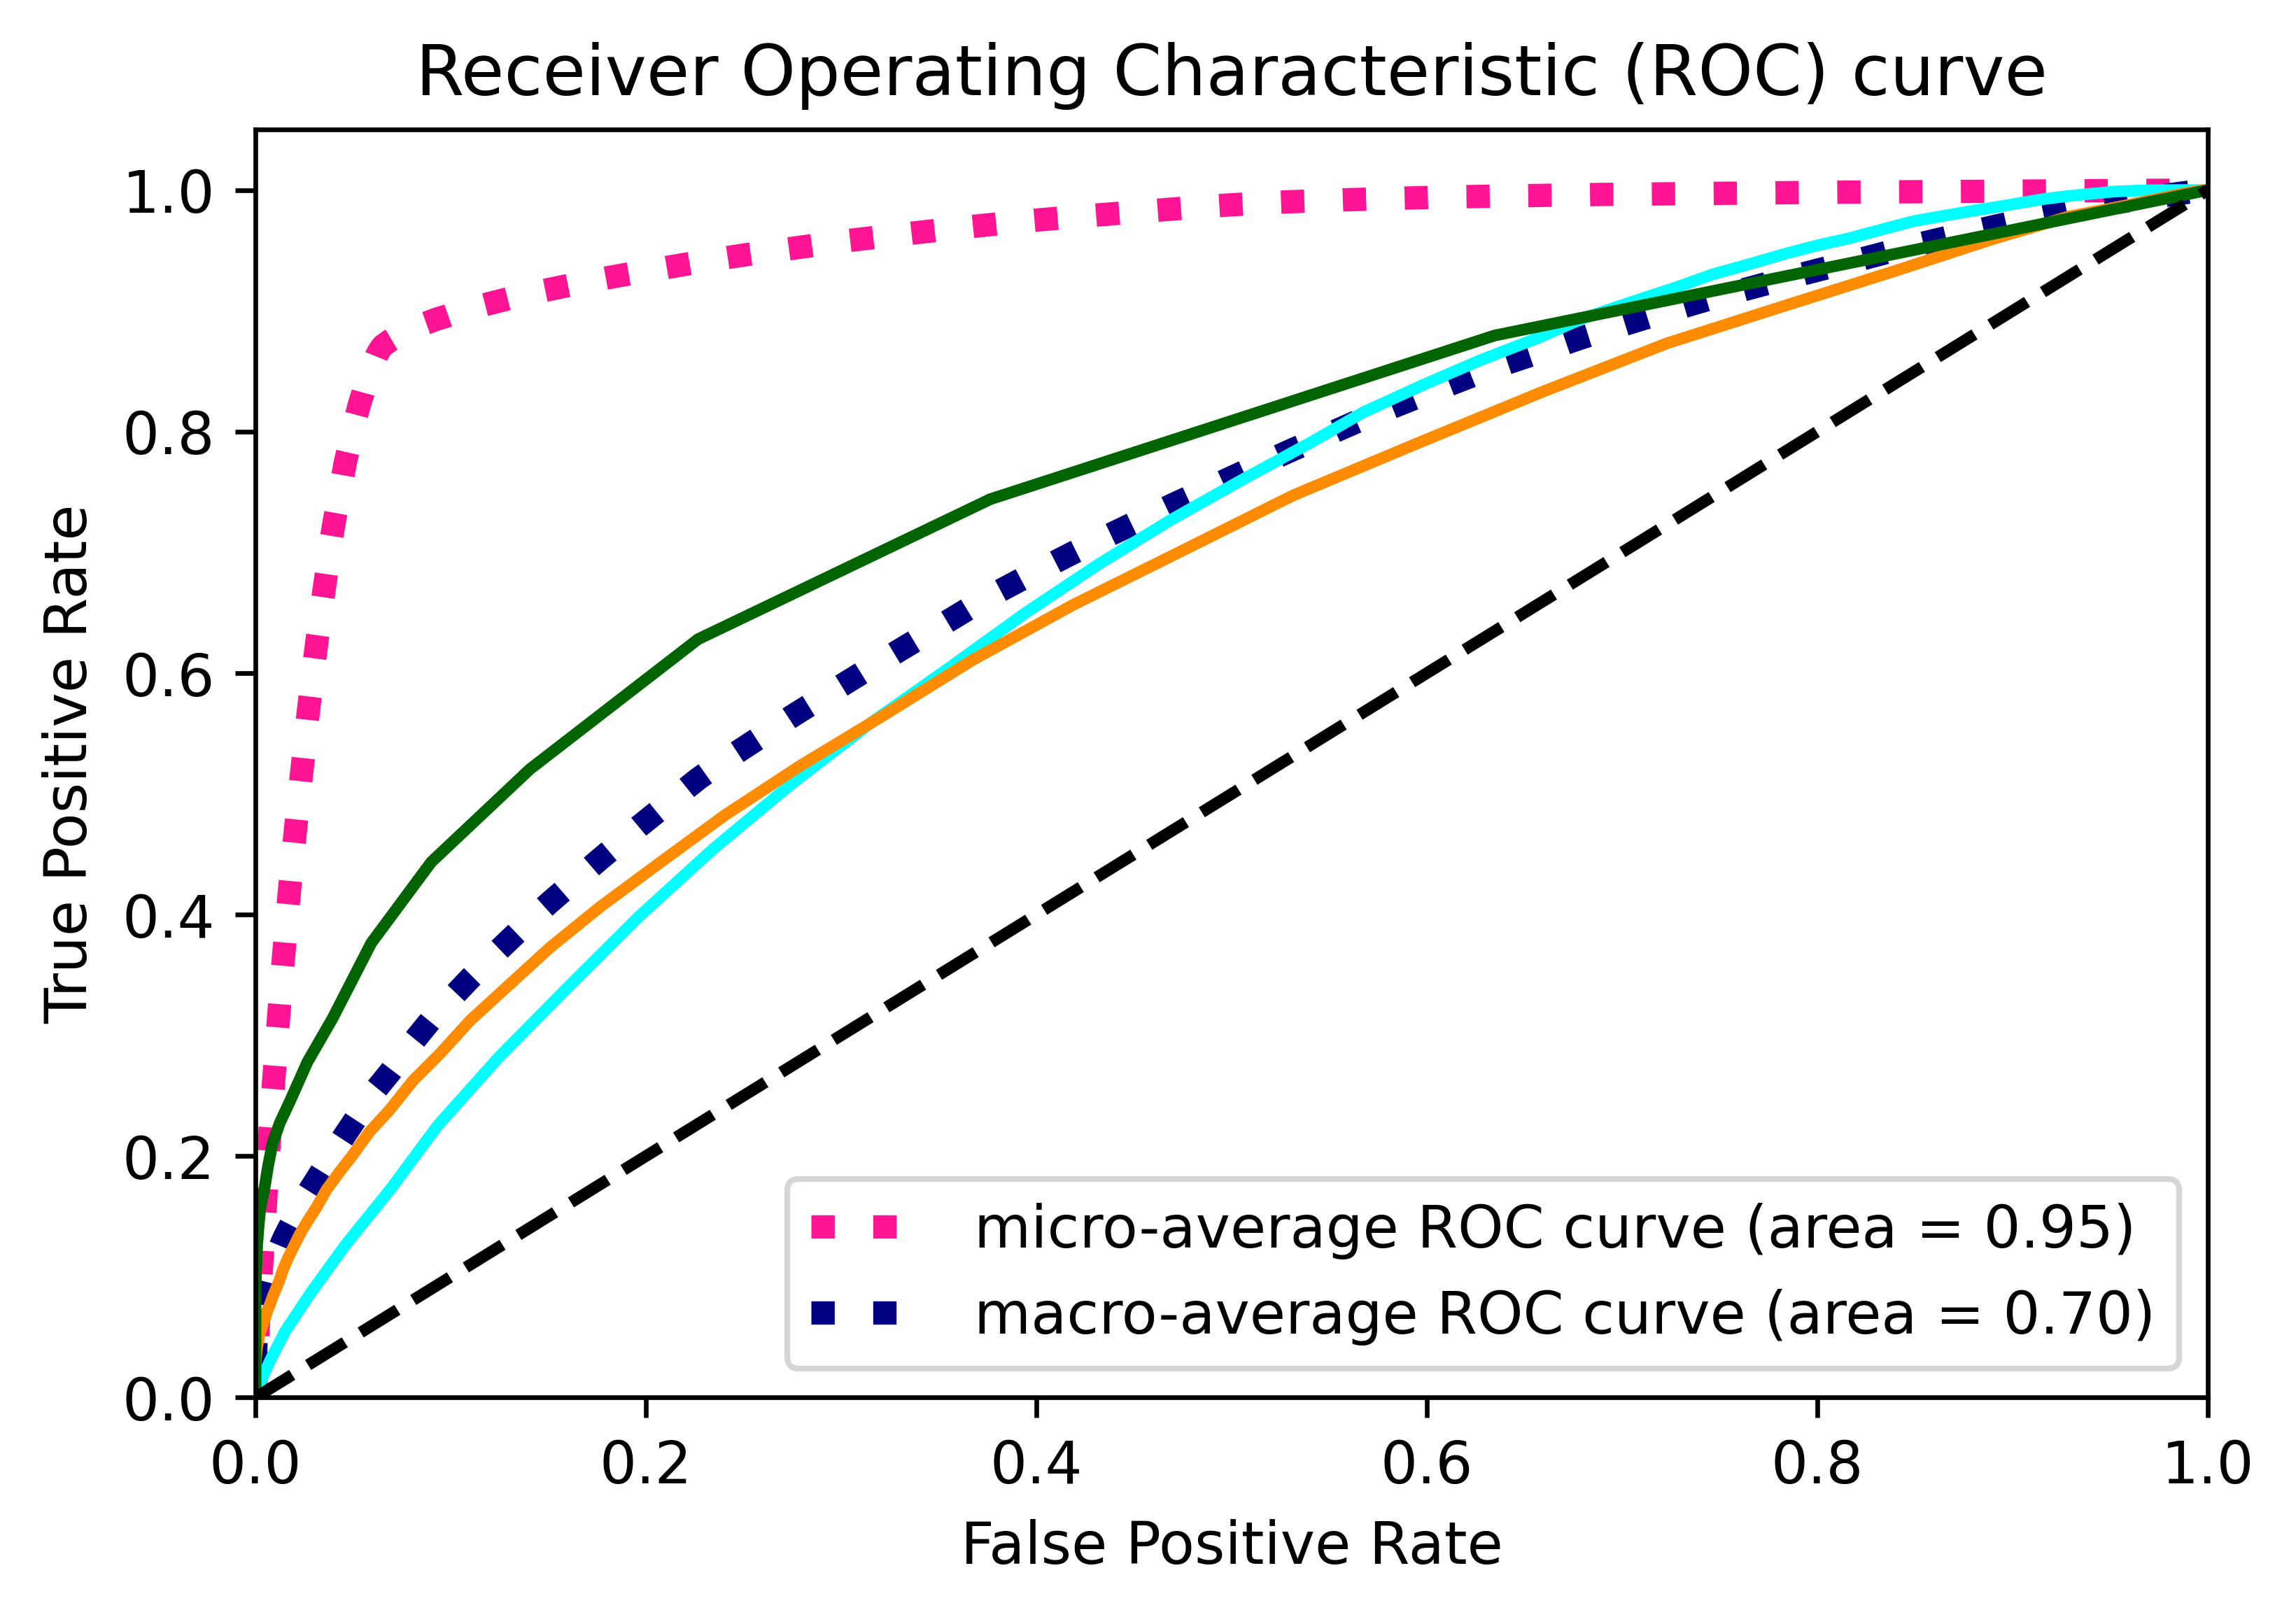

In [58]:
yhat2= clf.predict_proba(X_test2_after_Scaling)

plot_roc_curve(y_test2, yhat2)

In [63]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[84029   134     0]
 [11066   748     0]
 [ 1166    49   113]]
              precision    recall  f1-score   support

           0       0.87      1.00      0.93     84163
           1       0.80      0.06      0.12     11814
           2       1.00      0.09      0.16      1328

    accuracy                           0.87     97305
   macro avg       0.89      0.38      0.40     97305
weighted avg       0.87      0.87      0.82     97305



In [60]:
df5.to_parquet('accident_vehicle_preprocessed.parquet')
df5.to_csv('accident_vehicle_preprocessed.csv')